<a href="https://colab.research.google.com/github/jblanco89/ML-Zoomcamp-course/blob/main/ML_Zoomcamp_w2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression
## ML Zoomcamp

### Homework Module 2

*Author:* Javier Blanco


In [ ]:
#Importing libraries
import pandas as pd
import numpy as np

### Dataset

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-20 15:02:19--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.02s   

2023-09-20 15:02:20 (73.4 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [ ]:
data_house_df = pd.read_csv('/content/housing.csv', sep=',')
data_house_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Target column `median_house_value`


### EDA

<Axes: >

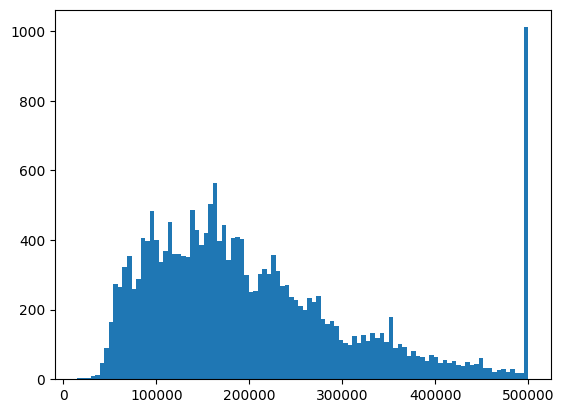

In [ ]:
house_price = data_house_df['median_house_value']
house_price.hist(grid=False, bins=100)

### Look at the median_house_value variable. Does it have a long tail?

I'd say yes, mainly between dollars 300K and 500K

### Subsetting dataset

In [ ]:
data_house_df = data_house_df[(data_house_df['ocean_proximity'] == '<1H OCEAN') | (data_house_df['ocean_proximity'] == 'INLAND')]
data_house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [ ]:
data_house_df = data_house_df.drop(columns='ocean_proximity')
data_house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


## Question 1:
There's one feature with missing values. What is it?

In [ ]:
data_house_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

`total_bedrooms`

## Question 2
What's the median (50% percentile) for variable `population`?

In [ ]:
data_house_df['population'].median()

1195.0

In [ ]:
data_house_df['population'].quantile(q=0.5)

1195.0

closest solution: `1195`

### Dataset shuffled


In [ ]:
np.random.seed(42)
data_house_df = data_house_df.sample(frac=1, random_state=42)
data_house_df.reset_index(drop=True, inplace=True)
data_house_df.shape

(15687, 9)

In [ ]:
data_house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


### Data splitting

In [ ]:
X_data = data_house_df.drop(columns='median_house_value')
y_data = data_house_df['median_house_value']

X_train_shape = int(X_data.shape[0] * 0.60)
X_val_shape = int(X_data.shape[0] * 0.20)
X_test_shape = int(X_data.shape[0] * 0.20)

y_train_shape = int(y_data.shape[0] * 0.60)
y_val_shape = int(y_data.shape[0] * 0.20)
y_test_shape = int(y_data.shape[0] * 0.20)

# X_indexes = np.arange(X_data)

X_train_set = X_data.iloc[:X_train_shape]
X_val_set = X_data.iloc[X_train_shape:X_train_shape + X_val_shape]
X_test_set = X_data.iloc[X_train_shape + X_val_shape:]

y_train_set = np.log1p(y_data.iloc[:y_train_shape])
y_val_set = np.log1p(y_data.iloc[y_train_shape:y_train_shape + y_val_shape])
y_test_set = np.log1p(y_data.iloc[y_train_shape + y_val_shape:])


X_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306


In [ ]:
y_train_set.head()

0    11.161963
1    12.321635
2    12.471896
3    12.359227
4    12.574531
Name: median_house_value, dtype: float64

### Dealing with Missing values

In [ ]:
X_train_filled_zeros = X_train_set.fillna(0)
X_val_set_filled_zeros = X_val_set.fillna(0)
X_train_filled_mean = X_train_set.fillna(value=X_train_set['total_bedrooms'].mean())

In [ ]:
#we need to add intercept column to X_train data,

w0_zeros = pd.Series(1, index=X_train_filled_zeros.index, name='W0')
w0_mean = pd.Series(1, index=X_train_filled_mean.index, name='W0')

#concatenate
X_train_filled_zeros = pd.concat([w0_zeros, X_train_filled_zeros], axis=1)
X_train_filled_zeros.head()


,W0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,1,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,1,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,1,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306


In [ ]:
# calculate coeffs:
XTX_inv = np.linalg.inv(np.dot(X_train_filled_zeros.T, X_train_filled_zeros))
coeffs = np.dot(np.dot(XTX_inv, X_train_filled_zeros.T), y_train_set)
coeffs

array([-9.76028239e+00, -2.55894354e-01, -2.68175850e-01,  1.78278062e-03,
       -3.37898192e-05,  2.93842680e-04, -1.52111419e-04,  3.96416869e-04,
        1.80614799e-01])

In [ ]:
X_val_set_filled_zeros = pd.concat([pd.Series(1, index=X_val_set_filled_zeros.index, name='W0'), X_val_set_filled_zeros], axis=1)

In [ ]:
y_pred = X_val_set_filled_zeros.dot(coeffs)
y_pred

9412     12.115888
9413     11.718202
9414     12.477934
9415     11.841947
9416     11.798392
           ...    
12544    11.643470
12545    11.423471
12546    11.029418
12547    12.402137
12548    12.060237
Length: 3137, dtype: float64

In [ ]:
rmse = np.sqrt(np.mean((y_pred - y_val_set) ** 2))
rmse

0.3409235996309938

We can definite a function to make this process reproducible


In [ ]:
def linear_regression(X_train, y_train, X_test, y_test, nan_handles = 0):

  if nan_handles != 'mean':
    X_train = X_train.fillna(nan_handles)
    X_test = X_test.fillna(nan_handles)
  else:
    nan_values_train = X_train.isna().any()
    nan_values_test = X_test.isna().any()
    for column in X_train.columns:
      if nan_values_train[column]:
          X_train[column].fillna(X_train[column].mean(), inplace=True)
    for column in X_test.columns:
      if nan_values_test[column]:
          X_test[column].fillna(X_test[column].mean(), inplace=True)

  w0_zeros_train = pd.Series(1, index=X_train.index, name='W0')
  X_train = pd.concat([w0_zeros_train, X_train], axis=1)

  w0_zeros_test = pd.Series(1, index=X_test.index, name='W0')
  X_test = pd.concat([w0_zeros_test, X_test], axis=1)

  XTX_train = X_train.T.dot(X_train)
  # XTX_train = XTX_train + reg
  XTX_inv = np.linalg.inv(XTX_train)
  coeffs = XTX_inv.dot(X_train.T).dot(y_train)

  y_pred = X_test.dot(coeffs)
  rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
  return rmse

In [ ]:
linear_regression(X_train_set,
                  y_train_set,
                  X_val_set,
                  y_val_set,
                  nan_handles=0)

0.3409235996309938

In [ ]:
linear_regression(X_train_set,
                  y_train_set,
                  X_val_set,
                  y_val_set,
                  nan_handles='mean')

<ipython-input-20-88328a5bae27>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column].fillna(X_train[column].mean(), inplace=True)
<ipython-input-20-88328a5bae27>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[column].fillna(X_test[column].mean(), inplace=True)


0.3406477015535313

**Both are equally good**

## Question 4

In [ ]:
def linear_regression(X_train, y_train, X_test, y_test, nan_handles = 0, reg:float = 0.01):

  if nan_handles != 'mean':
    X_train = X_train.fillna(nan_handles)
    X_test = X_test.fillna(nan_handles)
  else:
    nan_values_train = X_train.isna().any()
    nan_values_test = X_test.isna().any()
    for column in X_train.columns:
      if nan_values_train[column]:
          X_train[column].fillna(X_train[column].mean(), inplace=True)
    for column in X_test.columns:
      if nan_values_test[column]:
          X_test[column].fillna(X_test[column].mean(), inplace=True)

  w0_zeros_train = pd.Series(1, index=X_train.index, name='W0')
  X_train = pd.concat([w0_zeros_train, X_train], axis=1)

  w0_zeros_test = pd.Series(1, index=X_test.index, name='W0')
  X_test = pd.concat([w0_zeros_test, X_test], axis=1)

  XTX_train = X_train.T.dot(X_train)
  reg_values = reg * np.eye(XTX_train.shape[0])
  XTX_train = XTX_train + reg
  XTX_inv = np.linalg.inv(XTX_train)
  coeffs = XTX_inv.dot(X_train.T).dot(y_train)

  y_pred = X_test.dot(coeffs)
  rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
  rmse = round(rmse, 2)
  return rmse

In [ ]:
regs = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for i in regs:
  print(i,linear_regression(X_train_set,
                    y_train_set,
                    X_val_set,
                    y_val_set,
                    nan_handles=0, reg=i))

0 0.34
1e-06 0.34
0.0001 0.34
0.001 0.34
0.01 0.34
0.1 0.34
1 0.34
5 0.35
10 0.35


Which r gives the best RMSE?

`0`

## Question 5

Seed Influence

In [ ]:
def split_data(df, train_prop, val_prop, test_prop, target_col,random_state):
  df = data_house_df.sample(frac=1, random_state=random_state)
  df.reset_index(drop=True, inplace=True)

  X_data = data_house_df.drop(columns=target_col)
  y_data = data_house_df[target_col]

  X_train_shape = int(X_data.shape[0] * train_prop)
  X_val_shape = int(X_data.shape[0] * val_prop)
  X_test_shape = int(X_data.shape[0] * test_prop)

  y_train_shape = int(y_data.shape[0] * train_prop)
  y_val_shape = int(y_data.shape[0] * val_prop)
  y_test_shape = int(y_data.shape[0] * test_prop)

  # X_indexes = np.arange(X_data)

  X_train_set = X_data.iloc[:X_train_shape]
  X_val_set = X_data.iloc[X_train_shape:X_train_shape + X_val_shape]
  X_test_set = X_data.iloc[X_train_shape + X_val_shape:]

  y_train_set = np.log1p(y_data.iloc[:y_train_shape])
  y_val_set = np.log1p(y_data.iloc[y_train_shape:y_train_shape + y_val_shape])
  y_test_set = np.log1p(y_data.iloc[y_train_shape + y_val_shape:])

  set_data = [X_train_set,y_train_set, X_val_set, y_val_set, X_test_set, y_test_set]

  return set_data

In [ ]:
states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_list = []
# random_state = 10
for i in states:
  X_train, y_train, X_val, y_val, X_test, y_test = split_data(
      data_house_df,
              0.6,
              0.2,
              0.2,
              'median_house_value',
              random_state=i)
  rmse = linear_regression(X_train,
                            y_train,
                            X_val,
                            y_val,
                            nan_handles=0,
                            reg=0)
  print(f'random_state:{i}', f'rmse:{rmse}')
  rmse_list.append(rmse)

std_rmse = round(np.std(rmse_list),3)
std_rmse




random_state:0 rmse:0.34
random_state:1 rmse:0.34
random_state:2 rmse:0.34
random_state:3 rmse:0.34
random_state:4 rmse:0.34
random_state:5 rmse:0.34
random_state:6 rmse:0.34
random_state:7 rmse:0.34
random_state:8 rmse:0.34
random_state:9 rmse:0.34


0.0

What's the value of std?

`0.0005`

## Question 6

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(
      data_house_df,
              0.6,
              0.2,
              0.2,
              'median_house_value',
              random_state=9)

In [ ]:
X_train_val_combined = pd.concat([X_train, X_val], axis=0)
y_train_val_combined = pd.concat([y_train, y_val], axis=0)

In [ ]:
linear_regression(X_train_val_combined,
                  y_train_val_combined,
                  X_test,
                  y_test, nan_handles=0, reg=0.001)

0.33